<a href="https://colab.research.google.com/github/Anupam0104/Time_Series/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import normaltest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Project/Data/Time_Series.csv')
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock_Name
0,2019-05-31,34.149841,34.824672,33.714066,33.731499,38972000,0.0,0.0,NVDA
1,2019-06-03,33.843554,34.232016,33.019317,33.313152,47864400,0.0,0.0,NVDA
2,2019-06-04,33.955614,35.661365,33.733991,35.609070,64183600,0.0,0.0,NVDA
3,2019-06-05,36.348634,36.403417,34.817197,35.180756,51161600,0.0,0.0,NVDA
4,2019-06-06,35.223087,36.049817,35.198188,35.803291,40814000,0.0,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
2625,2021-06-24,134.248856,134.438574,132.731126,133.210419,68711000,0.0,0.0,AAPL
2626,2021-06-25,133.260356,133.689705,132.611319,132.910873,70783700,0.0,0.0,AAPL
2627,2021-06-28,133.210424,135.047667,133.150516,134.578369,62111300,0.0,0.0,AAPL
2628,2021-06-29,134.598343,136.285817,134.149019,136.126053,64556100,0.0,0.0,AAPL


## Performing EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2630 non-null   object 
 1   Open          2630 non-null   float64
 2   High          2630 non-null   float64
 3   Low           2630 non-null   float64
 4   Close         2630 non-null   float64
 5   Volume        2630 non-null   int64  
 6   Dividends     2630 non-null   float64
 7   Stock Splits  2630 non-null   float64
 8   Stock_Name    2630 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 185.0+ KB


In [ ]:
data.sample(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock_Name
1916,2020-10-01,3208.000000,3224.000000,3172.000000,3221.260010,4971900,0.0,0.0,AMZN
2550,2021-03-09,118.650391,121.670727,118.411159,120.703819,129525800,0.0,0.0,AAPL
528,2019-06-04,263.269989,268.929993,257.459991,268.709991,3750800,0.0,0.0,ADBE
1491,2021-02-26,135.420304,136.796688,133.380486,134.855896,11772600,0.0,0.0,QCOM
2292,2020-02-28,63.616764,68.846859,63.396676,67.598061,426510000,0.0,0.0,AAPL
2113,2019-06-13,47.707525,48.219639,47.437994,47.572758,86698400,0.0,0.0,AAPL
6,2019-06-10,36.794377,37.648498,36.794377,36.961216,40278000,0.0,0.0,NVDA
690,2020-01-24,354.100006,355.690002,349.200012,351.369995,1640200,0.0,0.0,ADBE
2132,2019-07-11,49.817245,50.081879,49.425198,49.434998,80767200,0.0,0.0,AAPL
756,2020-04-29,339.529999,351.250000,335.440002,349.170013,5006400,0.0,0.0,ADBE


In [ ]:
data.shape

(2630, 9)

In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
Stock_Name,0


## Data Preprocessing

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data = data.sort_values(by=['Stock_Name', 'Date'])

In [ ]:
unique = data['Stock_Name'].unique()

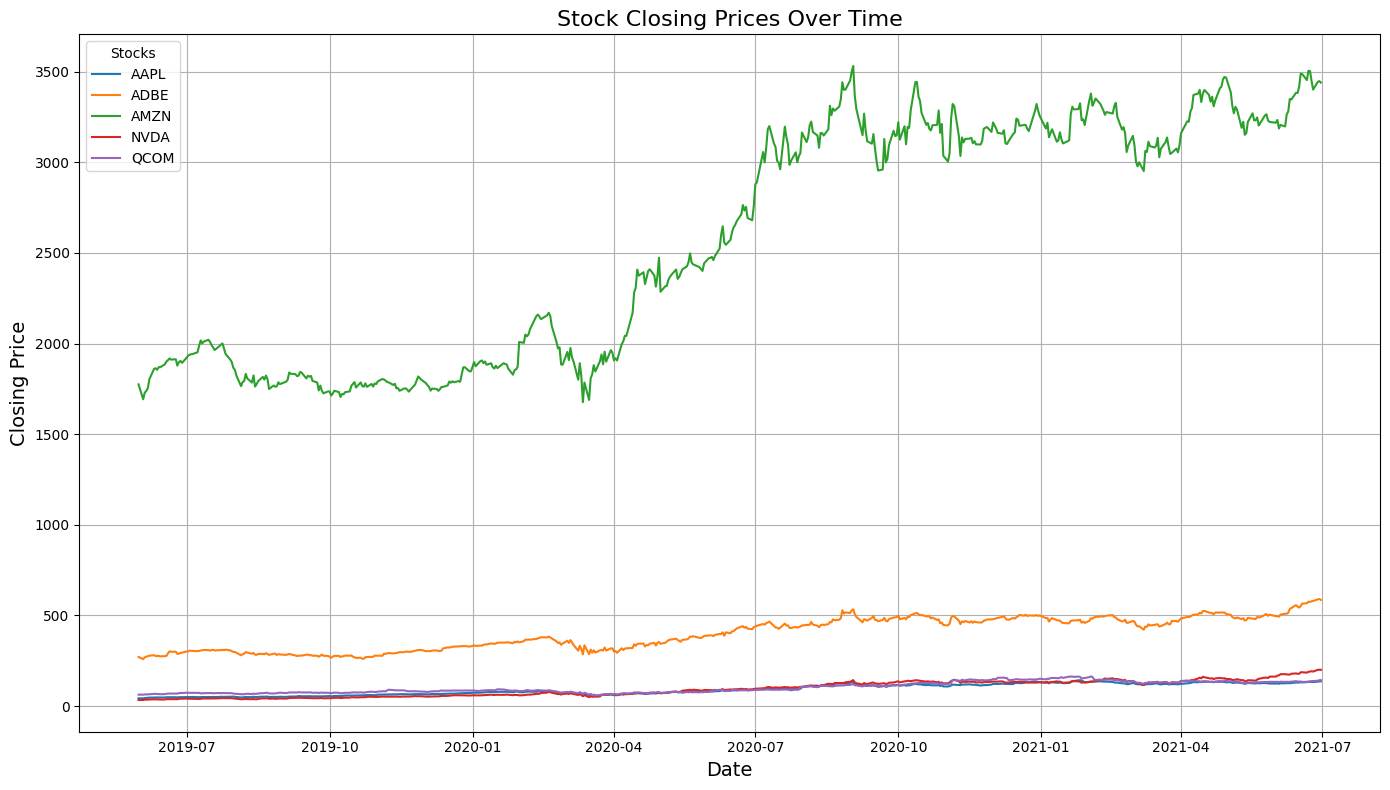

In [ ]:
plt.figure(figsize=(14, 8))
for stock in unique:
    stock_data = data[data['Stock_Name'] == stock]
    plt.plot(stock_data['Date'], stock_data['Close'], label=stock)

plt.title('Stock Closing Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.legend(title="Stocks")
plt.grid(True)
plt.tight_layout()
plt.show()

## Time Series Analysis

1. Apple


In [ ]:
stock_1 = 'AAPL'
aapl_data = data[data['Stock_Name'] == stock_1]

In [ ]:
aapl_data.set_index('Date', inplace=True)

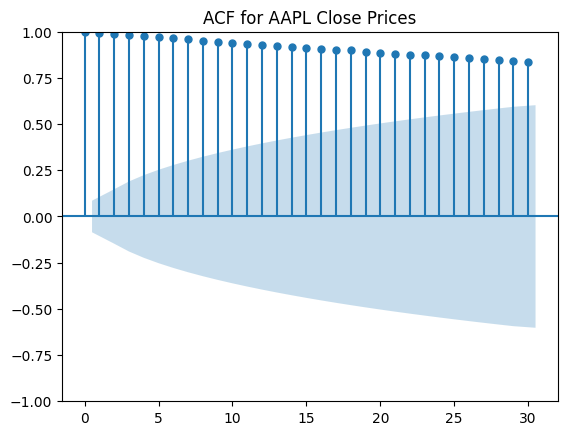

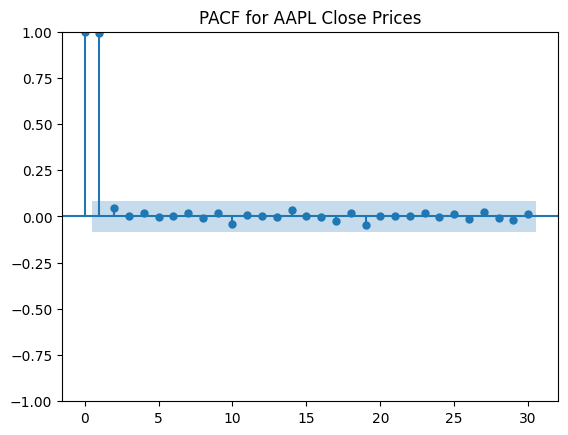

In [ ]:
plot_acf(aapl_data['Close'], lags=30, title='ACF for AAPL Close Prices')
plot_pacf(aapl_data['Close'], lags=30, title='PACF for AAPL Close Prices')
plt.show()

2. Nvidia

In [ ]:
stock_2 = 'NVDA'
nvda_data = data[data['Stock_Name'] == stock_2]

In [ ]:
nvda_data.set_index('Date', inplace=True)

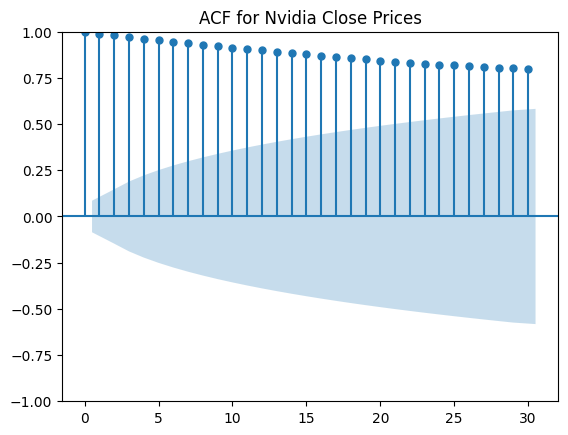

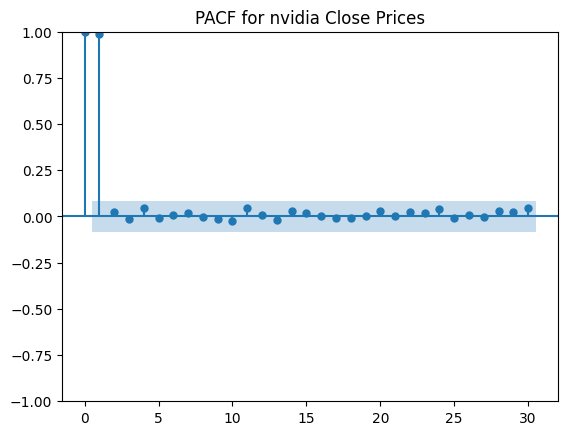

In [ ]:
plot_acf(nvda_data['Close'], lags=30, title='ACF for Nvidia Close Prices')
plot_pacf(nvda_data['Close'], lags=30, title='PACF for nvidia Close Prices')
plt.show()

3.Adobe

In [ ]:
stock_3 = 'ADBE'
adbe_data = data[data['Stock_Name'] == stock_3]

In [ ]:
adbe_data.set_index('Date', inplace=True)

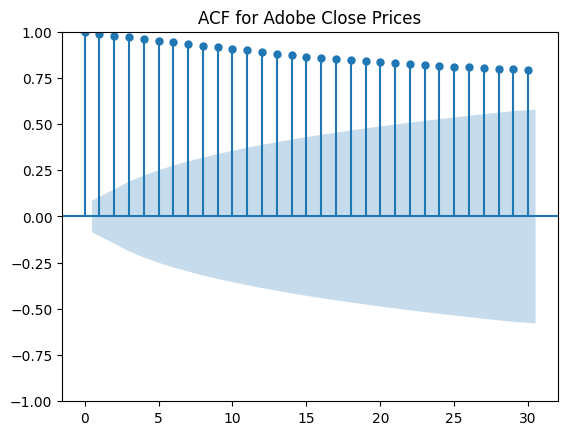

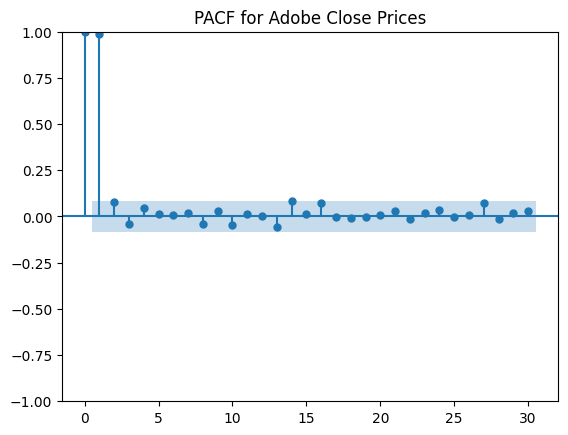

In [ ]:
plot_acf(adbe_data['Close'], lags=30, title='ACF for Adobe Close Prices')
plot_pacf(adbe_data['Close'], lags=30, title='PACF for Adobe Close Prices')
plt.show()

4.Qualcomm

In [ ]:
stock_4 = 'QCOM'
qcom_data = data[data['Stock_Name'] == stock_4]

In [ ]:
qcom_data.set_index('Date', inplace=True)

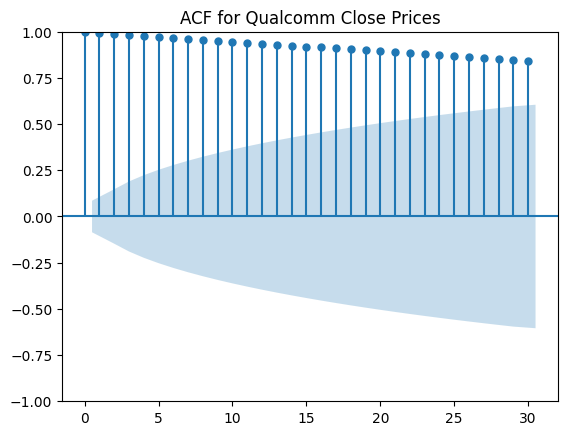

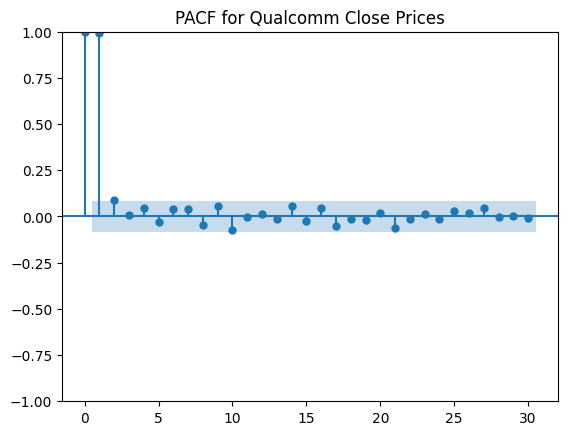

In [ ]:
plot_acf(qcom_data['Close'], lags=30, title='ACF for Qualcomm Close Prices')
plot_pacf(qcom_data['Close'], lags=30, title='PACF for Qualcomm Close Prices')
plt.show()

5.Amazon

In [ ]:
stock_5 = 'AMZN'
amzn_data = data[data['Stock_Name'] == stock_5]

In [ ]:
amzn_data.set_index('Date', inplace=True)

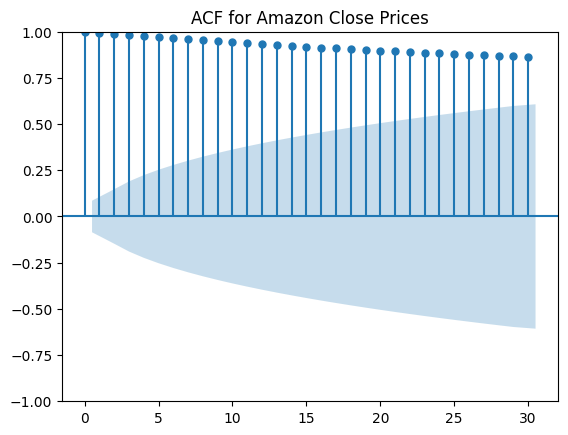

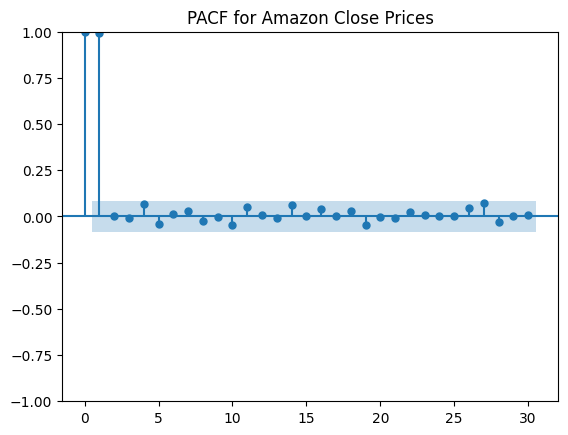

In [ ]:
plot_acf(amzn_data['Close'], lags=30, title='ACF for Amazon Close Prices')
plot_pacf(amzn_data['Close'], lags=30, title='PACF for Amazon Close Prices')
plt.show()

## Checking Assumptions

In [ ]:
# ... (Your previous code) ...

# MODEL FITTING
model = ARIMA(aapl_data['Close'], order=(1, 1, 1))
fit_model = model.fit() # This line creates the fit_model variable
print(fit_model.summary())

# ... (Rest of your code, including the part that uses fit_model.resid) ...

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  526
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1137.825
Date:                Thu, 02 Jan 2025   AIC                           2281.650
Time:                        07:32:03   BIC                           2294.440
Sample:                             0   HQIC                          2286.658
                                - 526                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3818      0.211     -1.806      0.071      -0.796       0.033
ma.L1          0.2538      0.223      1.140      0.254      -0.182       0.690
sigma2         4.4668      0.166     26.940      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


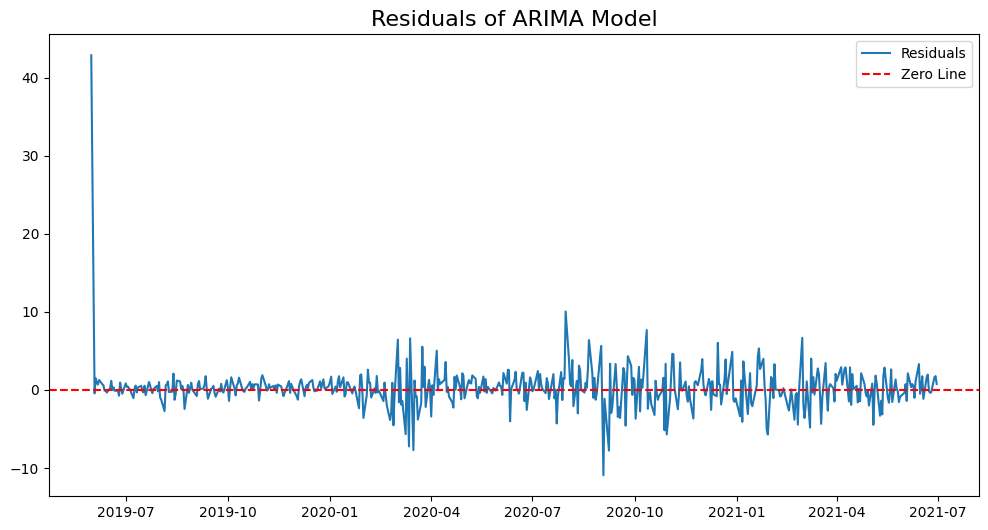

In [ ]:
residuals = fit_model.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')
plt.title('Residuals of ARIMA Model', fontsize=16)
plt.legend()
plt.show()

In [ ]:
# Check residuals for normality
stat, p = normaltest(residuals)
print("Normality Test:", "Pass" if p > 0.05 else "Fail", "(p-value =", p, ")")

Normality Test: Fail (p-value = 7.871954436130266e-155 )


In [ ]:
# Check residuals for autocorrelation
lb_result = acorr_ljungbox(residuals, lags=[10], return_df=False)
# acorr_ljungbox with return_df=False returns a DataFrame,
# so access the p-value using indexing
lb_stat = lb_result['lb_stat'].values[0] # Get the statistic value
lb_p = lb_result['lb_pvalue'].values[0]  # Get the p-value

print("Ljung-Box Test:", "Pass" if lb_p > 0.05 else "Fail", "(p-value =", lb_p, ")")

Ljung-Box Test: Pass (p-value = 0.9956526924788508 )


# MODEL FITTING

Apple

In [ ]:
model = ARIMA(aapl_data['Close'], order=(1, 1, 1))
fit_model_1 = model.fit()
print(fit_model_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  526
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1137.825
Date:                Thu, 02 Jan 2025   AIC                           2281.650
Time:                        07:43:46   BIC                           2294.440
Sample:                             0   HQIC                          2286.658
                                - 526                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3818      0.211     -1.806      0.071      -0.796       0.033
ma.L1          0.2538      0.223      1.140      0.254      -0.182       0.690
sigma2         4.4668      0.166     26.940      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast_1 = fit_model_1.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


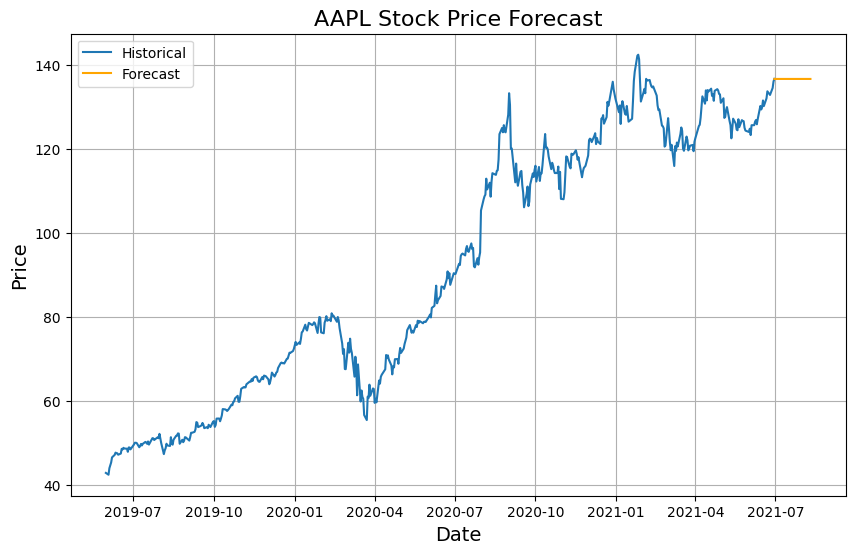

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(aapl_data['Close'], label='Historical')
plt.plot(pd.date_range(aapl_data.index[-1], periods=30, freq='B'), forecast_1, label='Forecast', color='orange')
plt.title(f'{stock_1} Stock Price Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Forecasted Prices for the next 30 days:")
print(forecast_1)

Forecasted Prices for the next 30 days:
526    136.710558
527    136.727569
528    136.721074
529    136.723554
530    136.722607
531    136.722969
532    136.722831
533    136.722883
534    136.722863
535    136.722871
536    136.722868
537    136.722869
538    136.722869
539    136.722869
540    136.722869
541    136.722869
542    136.722869
543    136.722869
544    136.722869
545    136.722869
546    136.722869
547    136.722869
548    136.722869
549    136.722869
550    136.722869
551    136.722869
552    136.722869
553    136.722869
554    136.722869
555    136.722869
Name: predicted_mean, dtype: float64


Nvidia

In [ ]:
model = ARIMA(nvda_data['Close'], order=(1, 1, 1))
fit_model_2 = model.fit()
print(fit_model_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  526
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1306.743
Date:                Thu, 02 Jan 2025   AIC                           2619.486
Time:                        07:43:47   BIC                           2632.276
Sample:                             0   HQIC                          2624.494
                                - 526                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3929      0.200     -1.969      0.049      -0.784      -0.002
ma.L1          0.2519      0.206      1.221      0.222      -0.152       0.656
sigma2         8.5006      0.369     23.030      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast_2 = fit_model_2.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


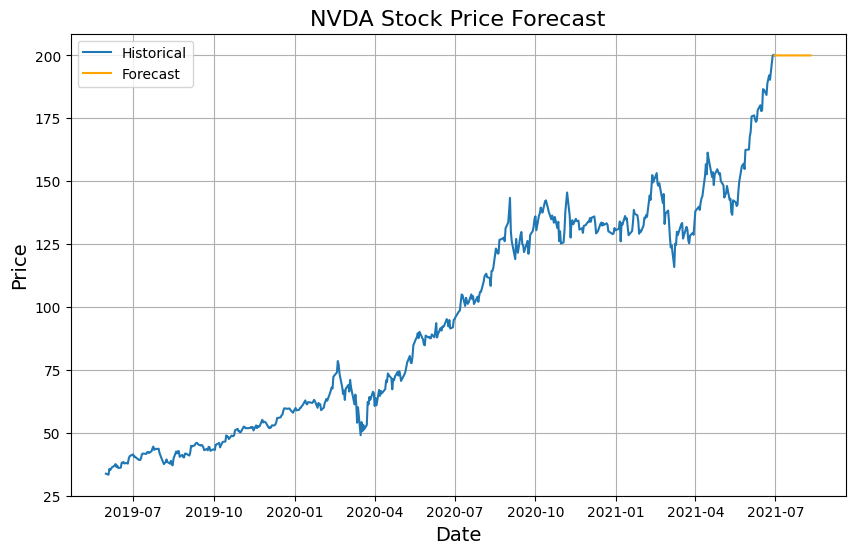

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(nvda_data['Close'], label='Historical')
plt.plot(pd.date_range(nvda_data.index[-1], periods=30, freq='B'), forecast_2, label='Forecast', color='orange')
plt.title(f'{stock_2} Stock Price Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Forecasted Prices for the next 30 days:")
print(forecast_2)

Forecasted Prices for the next 30 days:
526    199.983945
527    200.000074
528    199.993737
529    199.996227
530    199.995248
531    199.995633
532    199.995482
533    199.995541
534    199.995518
535    199.995527
536    199.995523
537    199.995525
538    199.995524
539    199.995524
540    199.995524
541    199.995524
542    199.995524
543    199.995524
544    199.995524
545    199.995524
546    199.995524
547    199.995524
548    199.995524
549    199.995524
550    199.995524
551    199.995524
552    199.995524
553    199.995524
554    199.995524
555    199.995524
Name: predicted_mean, dtype: float64


Adobe

In [ ]:
model = ARIMA(adbe_data['Close'], order=(1, 1, 1))
fit_model_3 = model.fit()
print(fit_model_3.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  526
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1888.171
Date:                Thu, 02 Jan 2025   AIC                           3782.343
Time:                        07:43:48   BIC                           3795.133
Sample:                             0   HQIC                          3787.351
                                - 526                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5109      0.098     -5.225      0.000      -0.703      -0.319
ma.L1          0.2841      0.099      2.862      0.004       0.090       0.479
sigma2        77.8912      2.810     27.716      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast_3 = fit_model_3.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


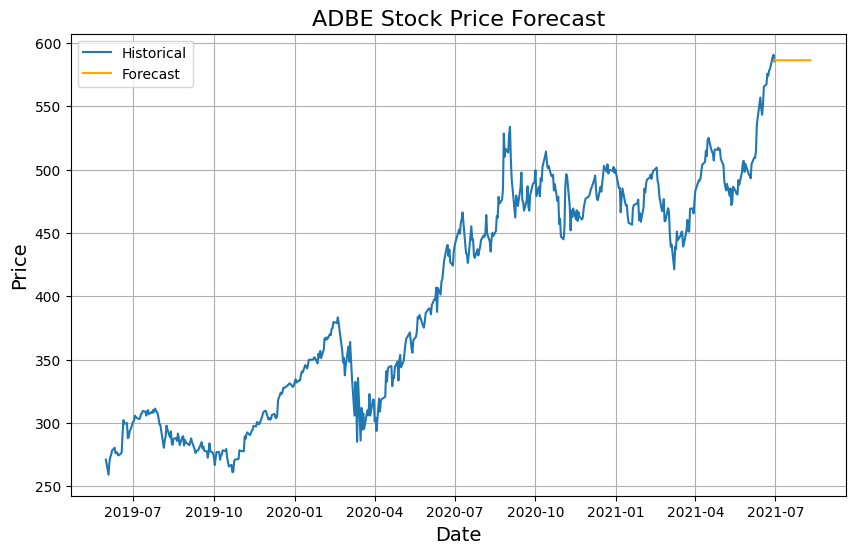

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adbe_data['Close'], label='Historical')
plt.plot(pd.date_range(adbe_data.index[-1], periods=30, freq='B'), forecast_3, label='Forecast', color='orange')
plt.title(f'{stock_3} Stock Price Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Forecasted Prices for the next 30 days:")
print(forecast_3)

Forecasted Prices for the next 30 days:
526    586.757106
527    586.186390
528    586.477966
529    586.329001
530    586.405106
531    586.366225
532    586.386089
533    586.375940
534    586.381125
535    586.378476
536    586.379830
537    586.379138
538    586.379492
539    586.379311
540    586.379403
541    586.379356
542    586.379380
543    586.379368
544    586.379374
545    586.379371
546    586.379373
547    586.379372
548    586.379372
549    586.379372
550    586.379372
551    586.379372
552    586.379372
553    586.379372
554    586.379372
555    586.379372
Name: predicted_mean, dtype: float64


Qualcomm

In [ ]:
model = ARIMA(qcom_data['Close'], order=(1, 1, 1))
fit_model_4 = model.fit()
print(fit_model_4.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  526
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1254.032
Date:                Thu, 02 Jan 2025   AIC                           2514.065
Time:                        07:43:49   BIC                           2526.855
Sample:                             0   HQIC                          2519.073
                                - 526                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4916      0.179     -2.749      0.006      -0.842      -0.141
ma.L1          0.3398      0.192      1.769      0.077      -0.037       0.716
sigma2         6.9541      0.206     33.746      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast_4 = fit_model_4.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


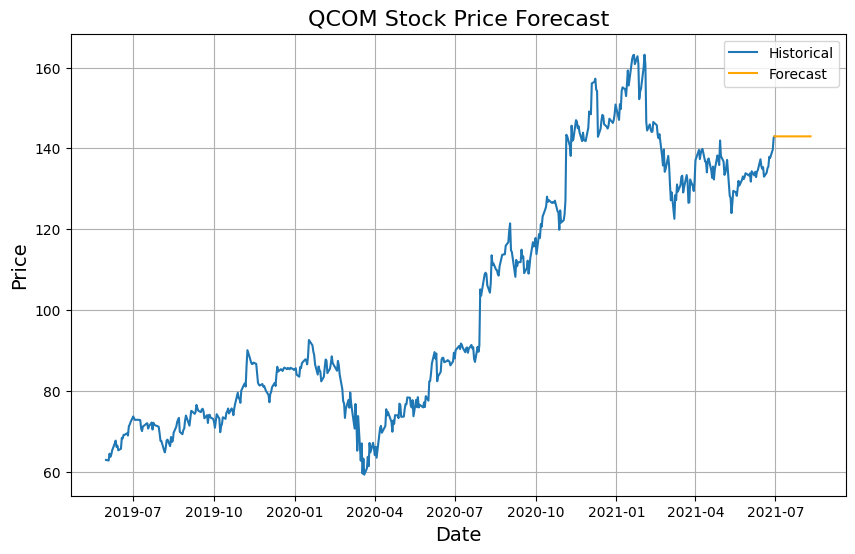

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(qcom_data['Close'], label='Historical')
plt.plot(pd.date_range(qcom_data.index[-1], periods=30, freq='B'), forecast_4, label='Forecast', color='orange')
plt.title(f'{stock_4} Stock Price Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Forecasted Prices for the next 30 days:")
print(forecast_4)

Forecasted Prices for the next 30 days:
526    142.989947
527    142.960476
528    142.974962
529    142.967841
530    142.971342
531    142.969621
532    142.970467
533    142.970051
534    142.970255
535    142.970155
536    142.970204
537    142.970180
538    142.970192
539    142.970186
540    142.970189
541    142.970188
542    142.970188
543    142.970188
544    142.970188
545    142.970188
546    142.970188
547    142.970188
548    142.970188
549    142.970188
550    142.970188
551    142.970188
552    142.970188
553    142.970188
554    142.970188
555    142.970188
Name: predicted_mean, dtype: float64


Amazon

In [ ]:
model = ARIMA(amzn_data['Close'], order=(1, 1, 1))
fit_model_5 = model.fit()
print(fit_model_5.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  526
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2808.164
Date:                Thu, 02 Jan 2025   AIC                           5622.327
Time:                        07:43:51   BIC                           5635.117
Sample:                             0   HQIC                          5627.335
                                - 526                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6877      0.189     -3.638      0.000      -1.058      -0.317
ma.L1          0.6156      0.207      2.967      0.003       0.209       1.022
sigma2      2591.2218    110.705     23.407      0.0

In [ ]:
forecast_5 = fit_model_5.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


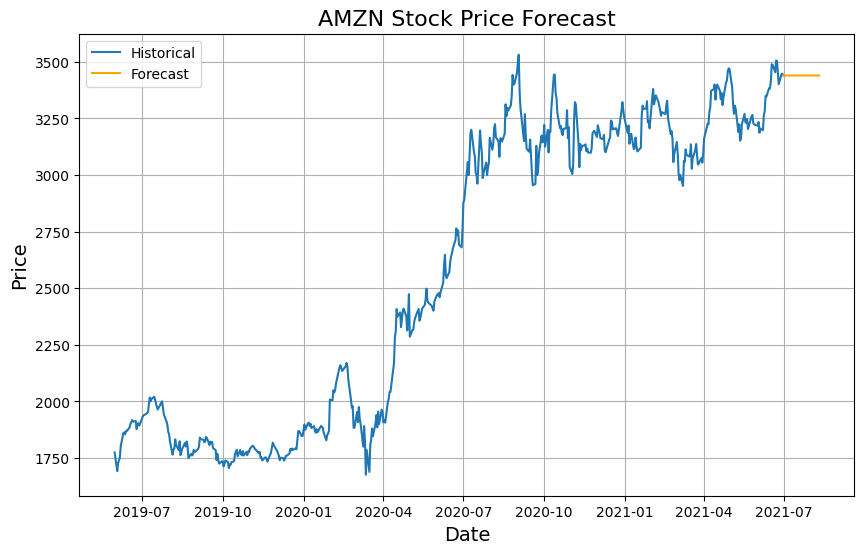

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(amzn_data['Close'], label='Historical')
plt.plot(pd.date_range(amzn_data.index[-1], periods=30, freq='B'), forecast_5, label='Forecast', color='orange')
plt.title(f'{stock_5} Stock Price Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Forecasted Prices for the next 30 days:")
print(forecast_5)

Forecasted Prices for the next 30 days:
526    3439.274941
527    3439.883556
528    3439.464998
529    3439.752850
530    3439.554887
531    3439.691031
532    3439.597402
533    3439.661793
534    3439.617510
535    3439.647964
536    3439.627020
537    3439.641424
538    3439.631518
539    3439.638330
540    3439.633645
541    3439.636867
542    3439.634651
543    3439.636175
544    3439.635127
545    3439.635848
546    3439.635352
547    3439.635693
548    3439.635459
549    3439.635620
550    3439.635509
551    3439.635585
552    3439.635533
553    3439.635569
554    3439.635544
555    3439.635561
Name: predicted_mean, dtype: float64


# Stress Scenario and Stress Testing

for apple


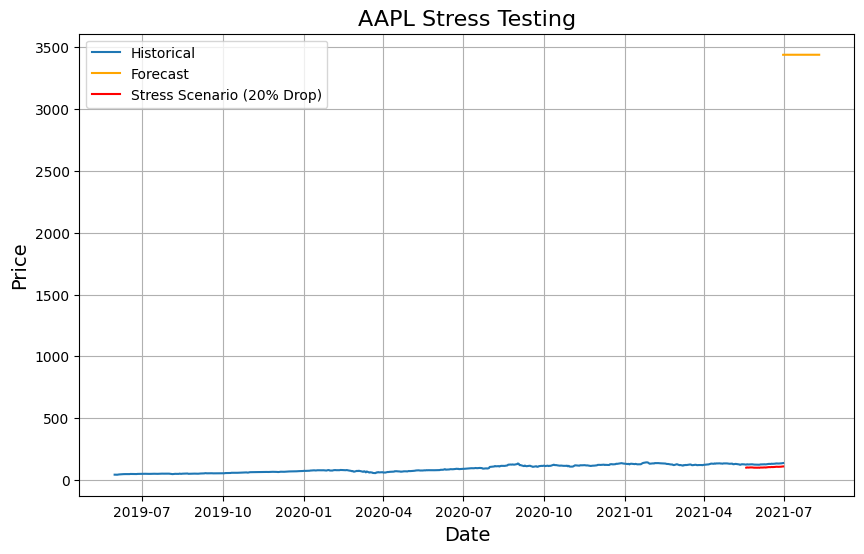

In [ ]:
stress_scenario_1 = aapl_data['Close'][-30:] * 0.8  # Apply 20% drop

# Plot historical, forecast, and stress scenario
plt.figure(figsize=(10, 6))
plt.plot(aapl_data['Close'], label='Historical')
plt.plot(pd.date_range(aapl_data.index[-1], periods=30, freq='B'), forecast, label='Forecast', color='orange')
plt.plot(stress_scenario_1.index, stress_scenario_1, label='Stress Scenario (20% Drop)', color='red')
plt.title(f'{stock_1} Stress Testing', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Nvidia

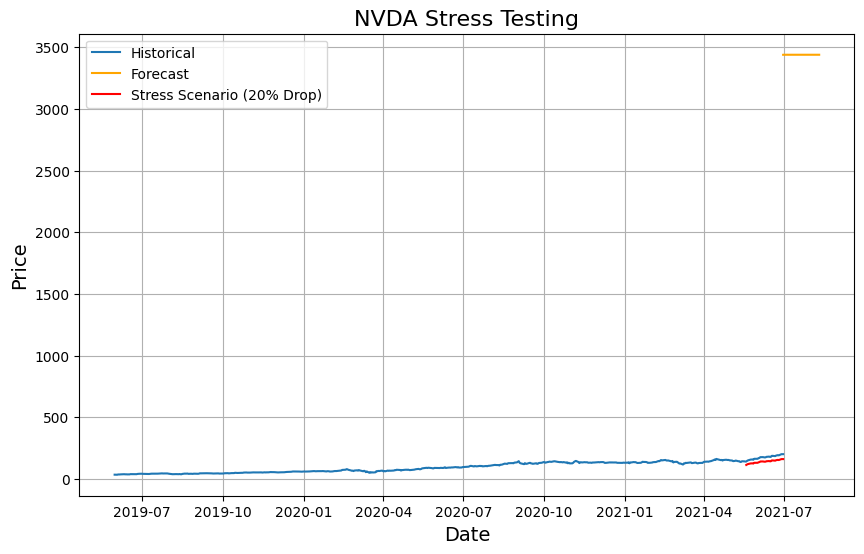

In [ ]:
stress_scenario_2 = nvda_data['Close'][-30:] * 0.8  # Apply 20% drop

# Plot historical, forecast, and stress scenario
plt.figure(figsize=(10, 6))
plt.plot(nvda_data['Close'], label='Historical')
plt.plot(pd.date_range(nvda_data.index[-1], periods=30, freq='B'), forecast, label='Forecast', color='orange')
plt.plot(stress_scenario_2.index, stress_scenario_2, label='Stress Scenario (20% Drop)', color='red')
plt.title(f'{stock_2} Stress Testing', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Adobe

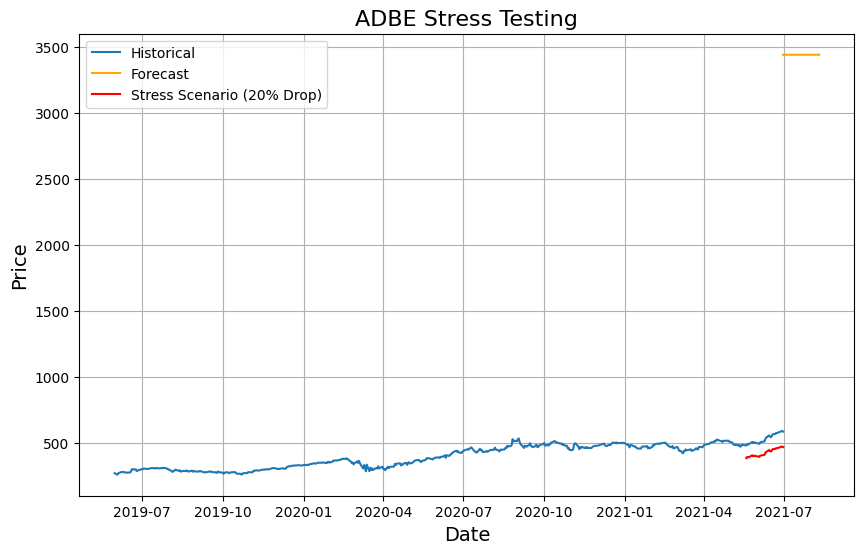

In [ ]:
stress_scenario_3 = adbe_data['Close'][-30:] * 0.8  # Apply 20% drop

# Plot historical, forecast, and stress scenario
plt.figure(figsize=(10, 6))
plt.plot(adbe_data['Close'], label='Historical')
plt.plot(pd.date_range(adbe_data.index[-1], periods=30, freq='B'), forecast, label='Forecast', color='orange')
plt.plot(stress_scenario_3.index, stress_scenario_3, label='Stress Scenario (20% Drop)', color='red')
plt.title(f'{stock_3} Stress Testing', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

qualcomm

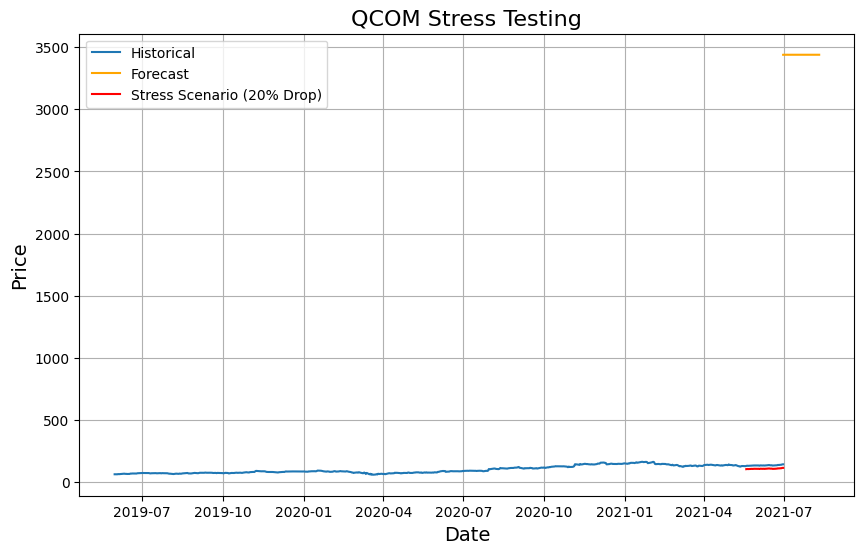

In [ ]:
stress_scenario_4 = qcom_data['Close'][-30:] * 0.8  # Apply 20% drop

# Plot historical, forecast, and stress scenario
plt.figure(figsize=(10, 6))
plt.plot(qcom_data['Close'], label='Historical')
plt.plot(pd.date_range(qcom_data.index[-1], periods=30, freq='B'), forecast, label='Forecast', color='orange')
plt.plot(stress_scenario_4.index, stress_scenario_4, label='Stress Scenario (20% Drop)', color='red')
plt.title(f'{stock_4} Stress Testing', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Amazon

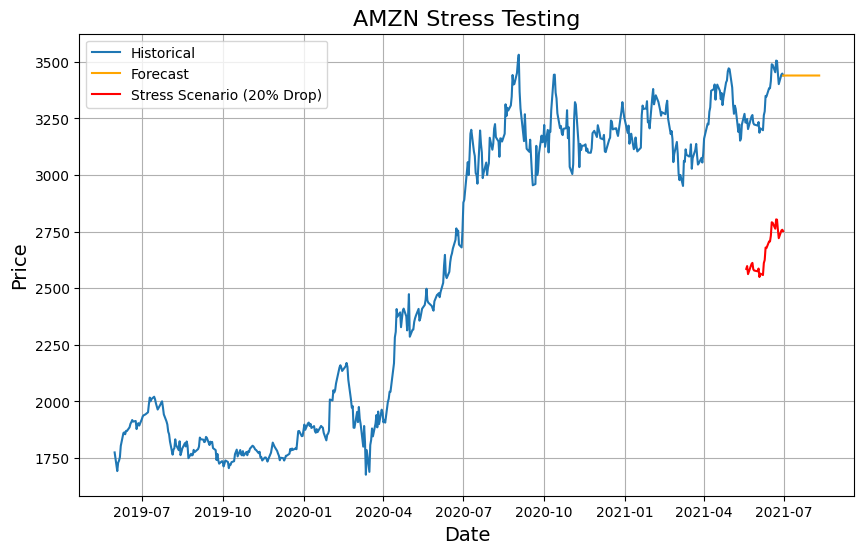

In [ ]:
stress_scenario_5 = amzn_data['Close'][-30:] * 0.8  # Apply 20% drop

# Plot historical, forecast, and stress scenario
plt.figure(figsize=(10, 6))
plt.plot(amzn_data['Close'], label='Historical')
plt.plot(pd.date_range(amzn_data.index[-1], periods=30, freq='B'), forecast, label='Forecast', color='orange')
plt.plot(stress_scenario_5.index, stress_scenario_5, label='Stress Scenario (20% Drop)', color='red')
plt.title(f'{stock_5} Stress Testing', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

All stocks together

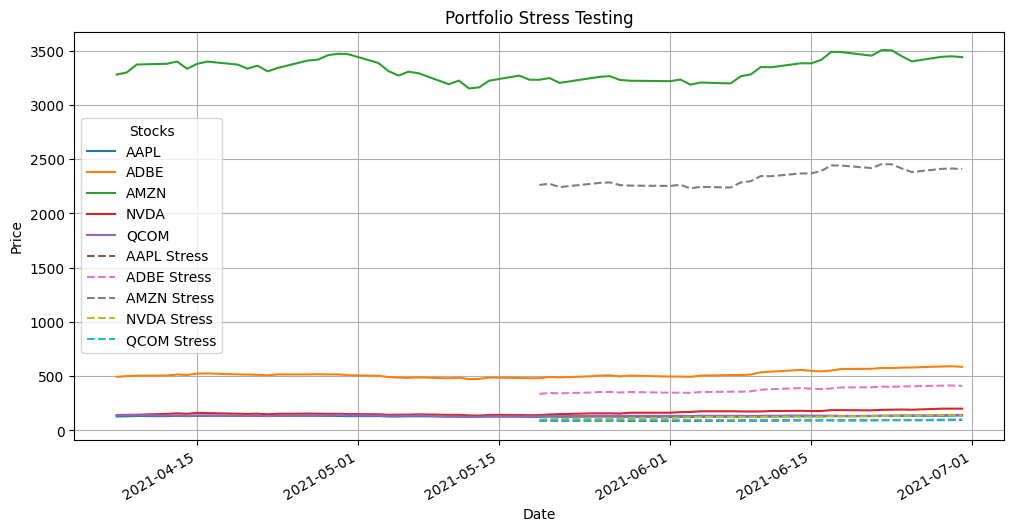

Value at Risk (95% confidence):
AAPL   -0.033458
ADBE   -0.039244
AMZN   -0.028866
NVDA   -0.040732
QCOM   -0.036128
Name: 0.05, dtype: float64
Correlation Matrix:
          AAPL      ADBE      AMZN      NVDA      QCOM
AAPL  1.000000  0.964006  0.953425  0.968340  0.950043
ADBE  0.964006  1.000000  0.972662  0.976389  0.881984
AMZN  0.953425  0.972662  1.000000  0.957384  0.876440
NVDA  0.968340  0.976389  0.957384  1.000000  0.905120
QCOM  0.950043  0.881984  0.876440  0.905120  1.000000


In [ ]:
portfolio = {}
for stock in unique:
    stock_data = data[data['Stock_Name'] == stock]
    stock_data.set_index('Date', inplace=True)
    portfolio[stock] = stock_data['Close']

portfolio_df = pd.DataFrame(portfolio)

# Simulate a recessionary drop of 30%
stress_portfolio = portfolio_df.iloc[-30:] * 0.7

# Plot historical vs stress scenario
plt.figure(figsize=(12, 6))
portfolio_df.iloc[-60:].plot(ax=plt.gca(), title="Portfolio Stress Testing")
stress_portfolio.plot(ax=plt.gca(), linestyle="--")
plt.ylabel("Price")
plt.legend(unique.tolist() + [f"{s} Stress" for s in unique], title="Stocks")
plt.grid(True)
plt.show()

# Risk Metrics: Portfolio Value at Risk (VaR)
def calculate_var(data, confidence_level=0.05):
    var = data.pct_change().dropna().quantile(confidence_level, axis=0)
    return var
var_95 = calculate_var(portfolio_df, confidence_level=0.05)
print("Value at Risk (95% confidence):")
print(var_95)

# Correlation Analysis
correlation_matrix = portfolio_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)
